<a href="https://colab.research.google.com/github/Sharonkimani/Car-price-prediction/blob/main/CAR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Car prices prediction**


### **Introduction:**
The automotive industry relies heavily on accurate pricing strategies to remain competitive and profitable. In this project, we aim to leverage machine learning techniques to predict car prices based on various attributes such as make, model, year, mileage, and condition. By developing predictive models, we can assist stakeholders in making informed decisions regarding pricing strategies, inventory management, and customer negotiations.

### **Problem Statement:**
The automotive industry faces challenges in accurately predicting car prices due to the complex interactions between numerous factors influencing pricing dynamics. Traditional pricing methods may lack precision and fail to capture the nuances of market demand, leading to suboptimal pricing decisions and potential revenue loss. Therefore, there is a need for robust predictive models that can accurately forecast car prices based on relevant attributes.


### **Objectives:**

1. **To Conduct Data Understanding and Preprocessing:** Explore the dataset comprehensively, handle missing values, and preprocess the data to prepare it for modeling.
2. **To Perform Exploratory Data Analysis (EDA):** Gain insights into the relationships between different variables and identify patterns or trends that may influence car prices through exploratory data analysis.
3. **To Develop Machine Learning Models:** Build machine learning models, including linear regression, decision tree regression, and random forest regression, to predict car prices based on the available attributes.
4. **To Evaluate Model Performance:** Assess the performance of the developed models using appropriate metrics such as mean squared error (MSE) and R-squared to measure predictive accuracy.

5. **To Document and Report Findings:** Document the analysis and modeling process, summarize key findings, and present actionable insights and recommendations to stakeholders.

In [1]:
#Importing libraries needed
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import GridSearchCV


In [2]:
df=pd.read_csv('/content/CarPricesPrediction.csv',index_col=0)
df.head()

,Make,Model,Year,Mileage,Condition,Price
0,Ford,Silverado,2022,18107,Excellent,19094.75
1,Toyota,Silverado,2014,13578,Excellent,27321.10
2,Chevrolet,Civic,2016,46054,Good,23697.30
3,Ford,Civic,2022,34981,Excellent,18251.05
4,Chevrolet,Civic,2019,63565,Excellent,19821.85


In [3]:
def understanding_data(df):
  print(df.info(memory_usage='deep'),'\n')
  print(f'The dataset has {df.isna().sum().sum()} missing values','\n')
  print(f'The dataset has {df.duplicated().sum()} duplicates')

understanding_data(df)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Make       1000 non-null   object 
 1   Model      1000 non-null   object 
 2   Year       1000 non-null   int64  
 3   Mileage    1000 non-null   int64  
 4   Condition  1000 non-null   object 
 5   Price      1000 non-null   float64
dtypes: float64(1), int64(2), object(3)
memory usage: 216.8 KB
None 

The dataset has 0 missing values 

The dataset has 0 duplicates


The dataset has 6 columns,3 numerical and 3 categorical, and 1000 rows. It doesn't have any missing values or any duplicates.

In [4]:
##Checking for data inconsistencies
def understanding_columns(df):
  for col in df.columns:
    print(f'Value counts for {col}')
    print(df[col].value_counts(),'\n')

understanding_columns(df)

Value counts for Make
Chevrolet    209
Toyota       205
Ford         199
Honda        199
Nissan       188
Name: Make, dtype: int64 

Value counts for Model
Altima       226
Camry        212
Silverado    192
F-150        188
Civic        182
Name: Model, dtype: int64 

Value counts for Year
2014    93
2011    92
2019    85
2010    83
2016    77
2021    77
2017    74
2013    73
2020    73
2022    72
2012    71
2018    68
2015    62
Name: Year, dtype: int64 

Value counts for Mileage
23865     2
109321    2
29419     2
29471     2
48764     2
         ..
102123    1
87290     1
146704    1
137604    1
128390    1
Name: Mileage, Length: 993, dtype: int64 

Value counts for Condition
Excellent    595
Good         292
Fair         113
Name: Condition, dtype: int64 

Value counts for Price
18806.85    2
20855.55    2
27529.15    2
19094.75    1
20426.60    1
           ..
18147.00    1
22893.95    1
15635.60    1
19664.90    1
18580.60    1
Name: Price, Length: 997, dtype: int64 



The data doesn't have any data inconsitencies.
### **Checking for outliers**

IQR for Year column: 6.0
Number of outliers in Year column: 0
IQR for Mileage column: 67423.5
Number of outliers in Mileage column: 0
IQR for Price column: 6548.412500000002
Number of outliers in Price column: 0


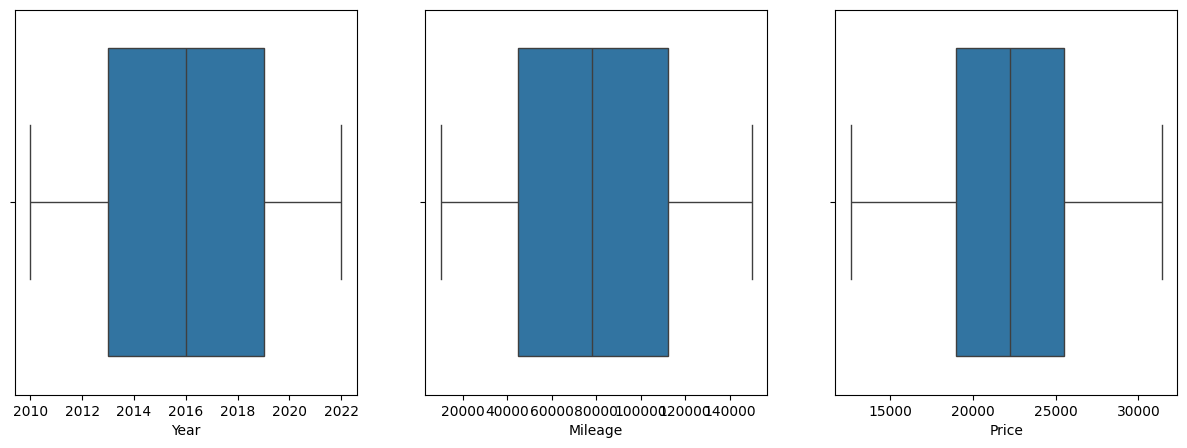

In [5]:
num= df.select_dtypes(exclude='object')
def check_outliers(data, columns):
    fig, axes = plt.subplots(nrows=1, ncols=len(columns), figsize=(15,5))
    for i, column in enumerate(columns):
        # Use interquartile range (IQR) to find outliers for the specified column
        q1 = data[column].quantile(0.25)
        q3 = data[column].quantile(0.75)
        iqr = q3 - q1
        print("IQR for {} column: {}".format(column, iqr))

        # Determine the outliers based on the IQR
        outliers = (data[column] < q1 - 1.5 * iqr) | (data[column] > q3 + 1.5 * iqr)
        print("Number of outliers in {} column: {}".format(column, outliers.sum()))

        # Create a box plot to visualize the distribution of the specified column
        sns.boxplot(data=data, x=column, ax=axes[i])
    plt.show()
check_outliers(num, num.columns)

In [6]:
df['Year']=df['Year'].astype('object')

The dataset has no outliers.
## **Univariate Analysis**

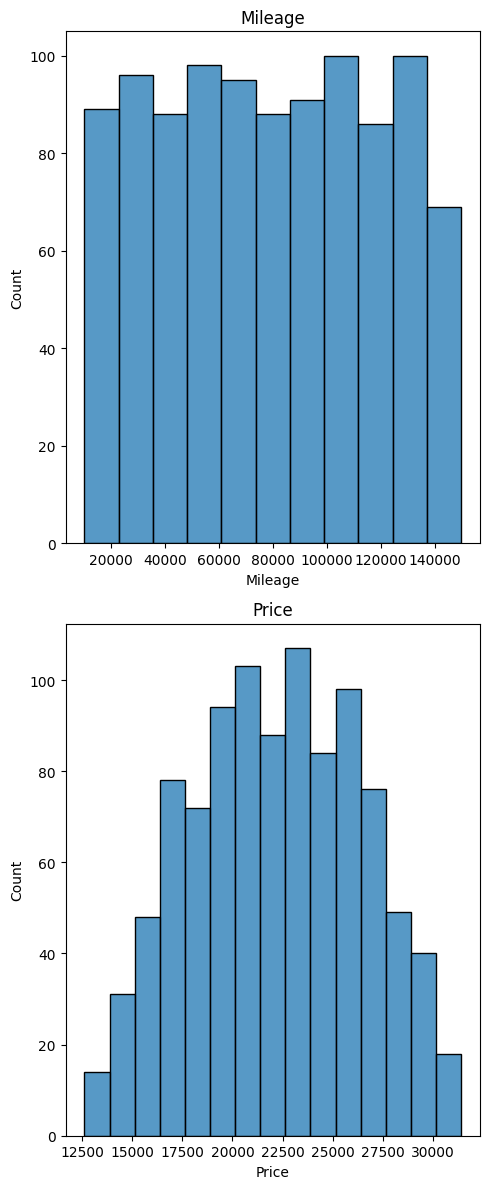

In [7]:
def univariate_num_analysis(df):
    num_cols = df.select_dtypes(include=['int64', 'float64']).columns
    num_cols_count = len(num_cols)
    fig, axes = plt.subplots(nrows=num_cols_count, ncols=1, figsize=(5, num_cols_count*6))

    for i, col in enumerate(num_cols):
        sns.histplot(data=df, x=col, ax=axes[i])
        axes[i].set_title(col)

    plt.tight_layout()
    plt.show()

univariate_num_analysis(df)


* Price: The histogram has a normal distribution,with the majority of car prices clustering around the mean value. This means that most car prices in the dataset are close to the average price, with fewer cars having significantly higher or lower prices.

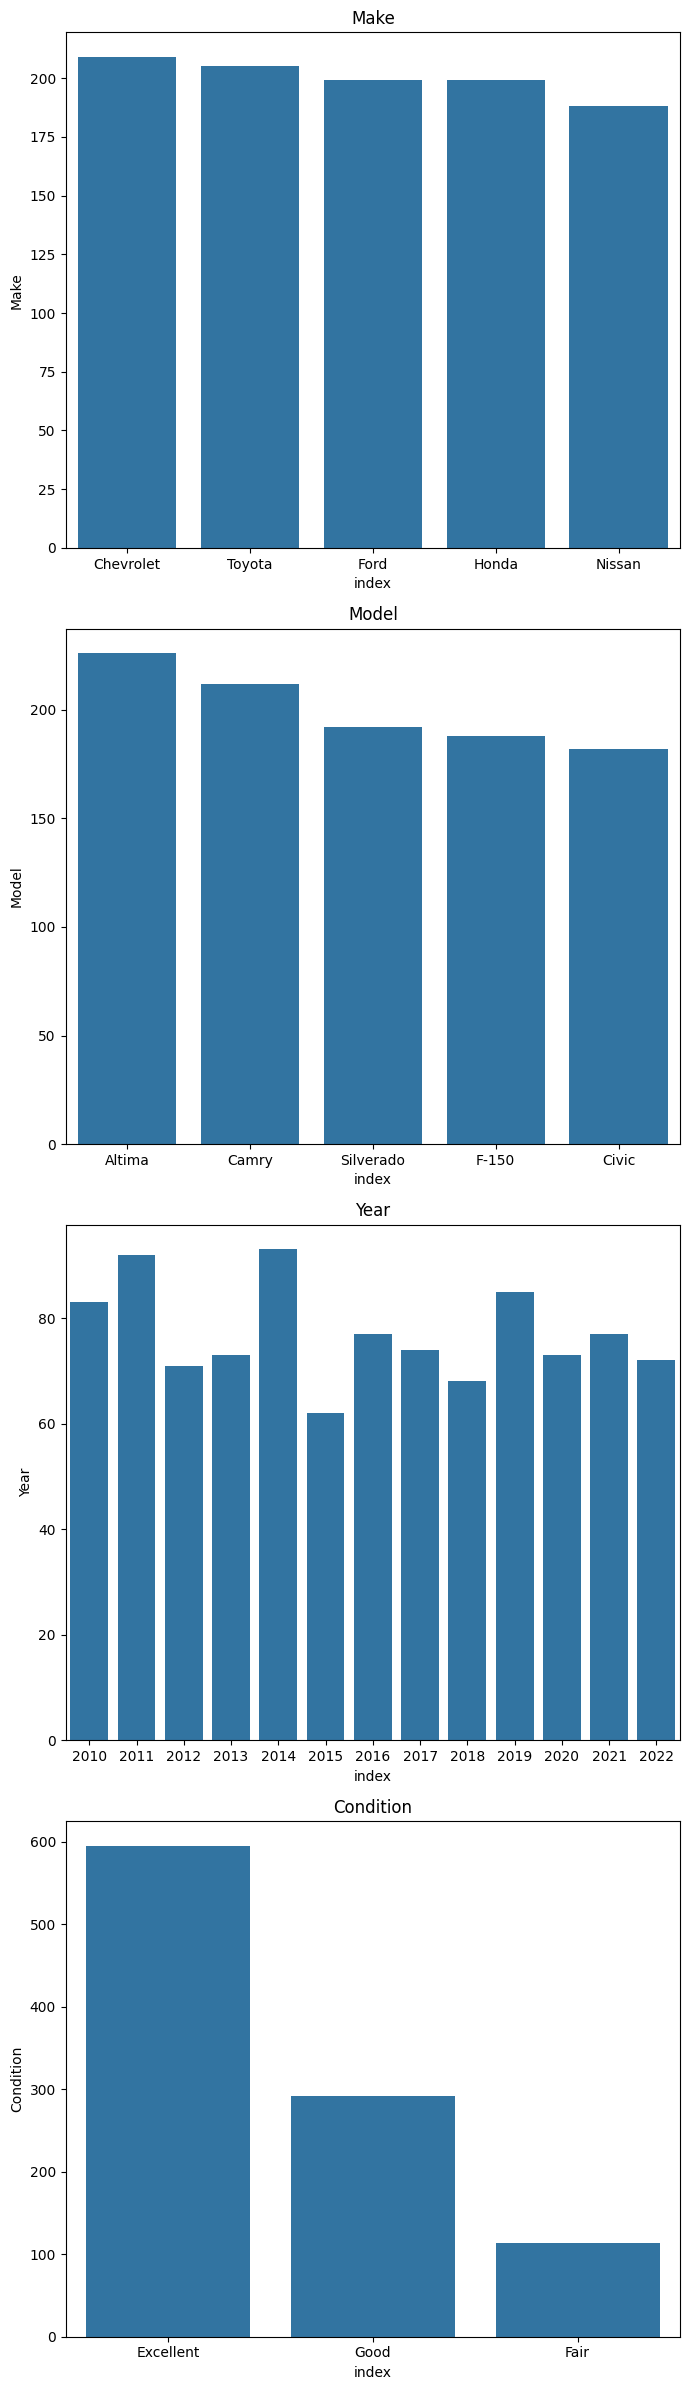

In [8]:
def univariate_cat_analysis(df):
    cat_cols = df.select_dtypes(include='object').columns
    cat_cols_count = len(cat_cols)
    fig, axes = plt.subplots(nrows=cat_cols_count, ncols=1, figsize=(7, cat_cols_count*6))

    for i, col in enumerate(cat_cols):
        d = df[col].value_counts().reset_index()
        sns.barplot(data=d, x='index', y=col, ax=axes[i])
        axes[i].set_title(col)

    plt.tight_layout()
    plt.show()

univariate_cat_analysis(df)


* Make: The prevalent car manufacturers within the dataset, listed from most to least common, include Chevrolet, Toyota, Ford, Honda, and Nissan.
* Model: The frequently occurring car models in the dataset, ranked from most to least common, consist of Altima, Camry, Silverado, F-150, and Civic.
* Condition: The majority of cars in the dataset are in excellent condition, followed by those classified as good, with only a small portion categorized as fair.

## **Bivariate Analysis**


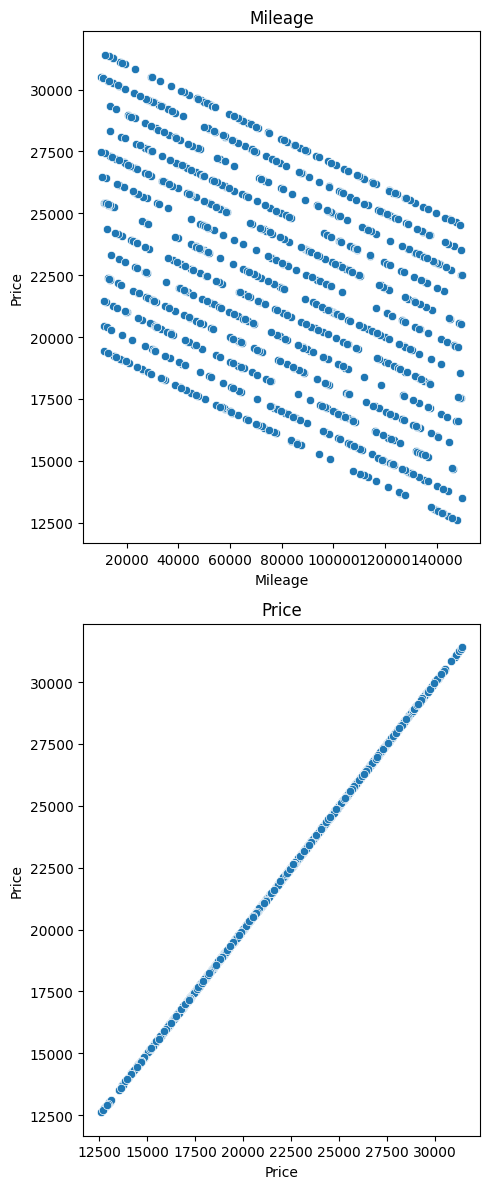

In [9]:
#numerical columns
def bivariate_num_analysis(df):
    num_cols = df.select_dtypes(exclude='object').columns
    num_cols_count = len(num_cols)
    fig, axes = plt.subplots(nrows=num_cols_count, ncols=1, figsize=(5, num_cols_count*6))

    for i, col in enumerate(num_cols):
        sns.scatterplot(data=df, x=col, y='Price', ax=axes[i])
        axes[i].set_title(col)

    plt.tight_layout()
    plt.show()

bivariate_num_analysis(df)

* Mileage vs. Price: The scatter plot reveals an inverse relationship between mileage and price, indicating that lower mileage tends to correspond to higher prices, and conversely, higher mileage correlates with lower prices.

* Price vs. Price: As anticipated, there is a perfect positive correlation observed in the scatter plot. This signifies that as the price increases along the x-axis, the price also increases along the y-axis in a consistent manner. This is expected since the correlation of a variable with itself is always perfect and positive, resulting in a linear relationship.

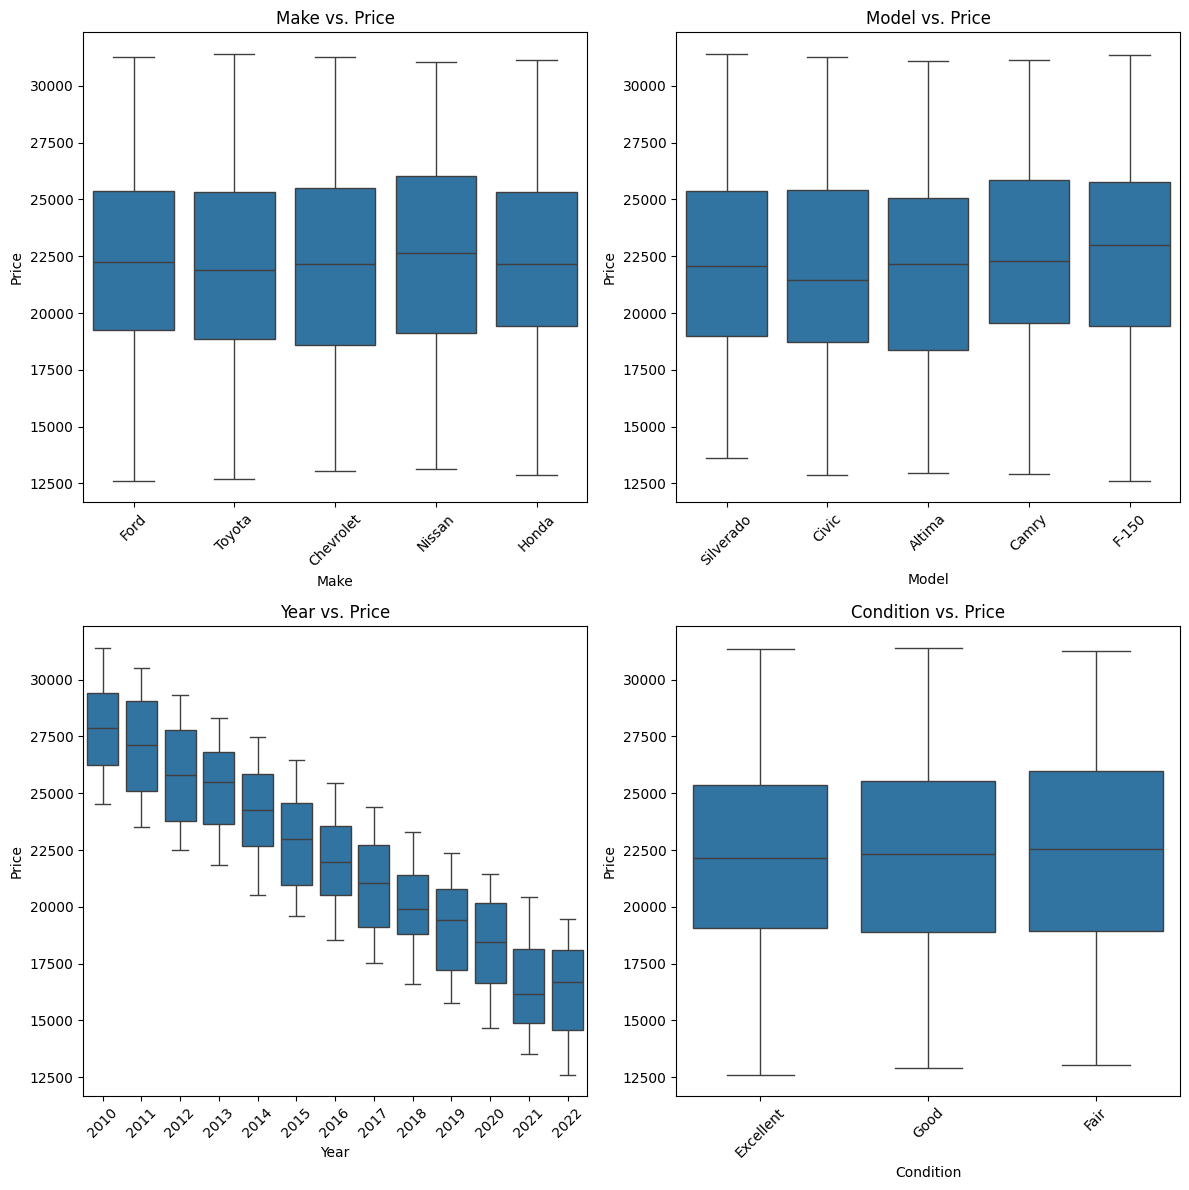

In [10]:
#categorial columns

def box_plots_categorical_columns(df):
    cat_cols = df.select_dtypes(include='object').columns
    num_plots = len(cat_cols)
    num_cols = 2
    num_rows = (num_plots + num_cols - 1) // num_cols
    fig, axes = plt.subplots(num_rows, num_cols, figsize=(12, 6 * num_rows))
    axes = axes.flatten()

    for i, col in enumerate(cat_cols):
        sns.boxplot(data=df, x=col, y='Price', ax=axes[i])
        axes[i].set_title(f'{col} vs. Price')
        axes[i].tick_params(axis='x', rotation=45)

    # Remove empty subplot(s) if num_cols * num_rows > num_plots
    if num_cols * num_rows > num_plots:
        for j in range(num_cols * num_rows - num_plots):
            fig.delaxes(axes[num_plots + j])

    plt.tight_layout()
    plt.show()

box_plots_categorical_columns(df)


* Make vs. Price: Based on the box plots, the ranking of car makes from most expensive to least expensive is as follows: Nissan, Ford, Chevrolet, Honda, and Toyota. This indicates that, on average, cars manufactured by Nissan tend to have higher prices compared to those of other makes, while Toyota cars have relatively lower prices.

* Model vs. Price: According to the box plots, the order of car models from most expensive to least expensive is: F-150, Camry, Altima, Silverado, and Civic.

* Year vs. Price: The box plots reveal that cars manufactured in 2010 are the most expensive. Subsequently, from 2011 to 2021, there is a gradual decline in prices. However, in 2022, there is an observed increase in prices. This trend suggests that car prices have generally been decreasing over the years, with a recent uptick in 2022.


There could be several reasons for the observed trend in the relationship between year and price:

1. **Historical Significance:** Cars manufactured in 2010 may hold historical significance for various reasons, such as being the final year of production for a particular model or representing a milestone in automotive technology. This historical significance can contribute to their higher prices compared to newer models.

2. **Collector's Items:** Some cars manufactured in 2010 or earlier may be considered collector's items, particularly if they are rare, limited edition, or associated with significant cultural or historical events. These collector's items can command higher prices in the market, contributing to the observed trend of higher prices for older models.

3. **Market Dynamics:** Fluctuations in supply and demand, changes in consumer preferences, and shifts in the overall economy can all influence the prices of cars across different model years. The recent uptick in prices in 2022 may be driven by factors such as increased demand for used cars, supply chain disruptions affecting the

* Condition vs. Price: According to the box plots, cars in fair condition have the highest prices, followed by those in good condition, and finally, those in excellent condition. This indicates that, contrary to expectations, cars in fair condition command higher prices on average compared to those in better conditions, such as good or excellent.

There could be several reasons for the unexpected relationship between condition and price observed in the box plots:

1. **Scarcity or Rarity:** Cars in fair condition might belong to a particular model or make that is rare or discontinued, leading to higher demand among collectors. This scarcity can drive up prices despite the lower condition.

2. **Vintage or Classic Cars:** Fair condition might apply to vintage or classic cars, which have historical significance or cultural value. Even in fair condition, these cars can fetch higher prices due to their uniqueness and collectability.

3. **Special Features or Modifications:** Some cars in fair condition might have special features or modifications that increase their value, such as aftermarket upgrades or customization. These unique characteristics can justify higher prices despite the overall lower condition.

4. **Historical or Sentimental Value:** Fair condition cars could have sentimental value to their owners or a historical significance that makes them desirable to buyers. This emotional attachment can drive up prices beyond what is typically expected for their condition.

5. **Market Dynamics:** Market dynamics, including supply and demand fluctuations, regional preferences, and economic factors, can influence the perceived value of cars in different conditions. Factors such as local market demand or trends in the used car market could contribute to higher prices for fair condition cars.

6. **Maintenance and Restoration Potential:** Buyers might see fair condition cars as having greater potential for restoration or customization, which can justify paying higher prices with the intention of investing in repairs or improvements.






## **Mulitivariate analysis**

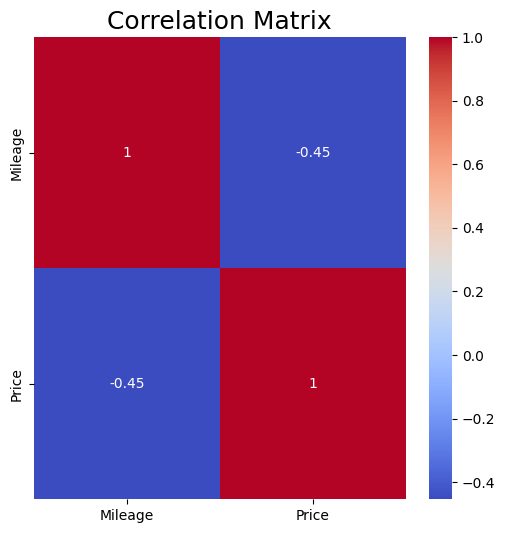

In [11]:
corr_matrix = df.corr()
fig, ax = plt.subplots(figsize=(6,6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', ax=ax)
plt.title('Correlation Matrix', fontsize=18)
plt.show()

As confirmed earlier using the scatter plots, mileage and price have an inverse relationship and their correlation is -0.45.

# Modelling.


In [12]:
# Converting the categorical columns to numerical columns.
df['Year']=df['Year'].astype('int64')#year

cols = ['Make', 'Model', 'Condition']
encoder = OneHotEncoder()

# Fit and transform the categorical columns
encoded_data = encoder.fit_transform(df[cols])

# Convert the encoded data to a DataFrame
encoded_df = pd.DataFrame(encoded_data.toarray(), columns=encoder.get_feature_names_out(cols))

# Concatenate the encoded DataFrame with the original DataFrame
df_encoded = pd.concat([df, encoded_df], axis=1)

# Drop the original categorical columns
df_encoded.drop(cols, axis=1, inplace=True)


In [13]:
df_encoded.head()

,Year,Mileage,Price,Make_Chevrolet,Make_Ford,Make_Honda,Make_Nissan,Make_Toyota,Model_Altima,Model_Camry,Model_Civic,Model_F-150,Model_Silverado,Condition_Excellent,Condition_Fair,Condition_Good
0,2022,18107,19094.75,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
1,2014,13578,27321.10,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
2,2016,46054,23697.30,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
3,2022,34981,18251.05,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
4,2019,63565,19821.85,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


### **Baseline model, Linear regression model**

In [14]:
# Split the data into training and testing sets
y= df_encoded[['Price']]
X= df_encoded.drop('Price', axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features if using linear regression
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize and fit the models
linear_reg = LinearRegression()
linear_reg.fit(X_train_scaled, y_train)
# Make predictions
y_pred_linear = linear_reg.predict(X_test_scaled)

# Evaluate the models
mse_linear = mean_squared_error(y_test, y_pred_linear)
print("Mean Squared Error (Linear Regression):", mse_linear)

r2_linear = r2_score(y_test, y_pred_linear)
print("R-squared (Linear Regression):", r2_linear)




Mean Squared Error (Linear Regression): 0.00477726857953505
R-squared (Linear Regression): 0.9999999997642388


For a baseline model, the R-squared value is 99.9999999%, indicating that the predictor variables account for nearly all of the total variation in the price. This high R-squared value suggests that the model explains the variability in the target variable extremely well, with very little unexplained variance remaining. In other words, the predictor variables in the baseline model are highly effective at predicting the price of the target variable.

### Decision tree

In [15]:
decision_tree_reg = DecisionTreeRegressor()
decision_tree_reg.fit(X_train, y_train)

y_pred_decision_tree = decision_tree_reg.predict(X_test)

mse_decision_tree = mean_squared_error(y_test, y_pred_decision_tree)

print("Mean Squared Error (Decision Tree Regression):", mse_decision_tree)

# Calculate R-squared for decision tree regression
r2_decision_tree = r2_score(y_test, y_pred_decision_tree)


print("R-squared (Decision Tree Regression):", r2_decision_tree)


Mean Squared Error (Decision Tree Regression): 52377.027150000045
R-squared (Decision Tree Regression): 0.9974151608994523


In [16]:
decision_tree_reg.get_params()

{'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

The initial decision tree model, serving as our baseline, achieves an R-squared value of 99.8%. This indicates that the predictor variables account for 99.8% of the total variation in car prices. Notably, this R-squared value is slightly lower than that of the linear regression model. To potentially enhance the decision tree model's performance, we can tune its hyperparameters using grid search.

In [17]:
# Define the hyperparameters grid
param_grid = {
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]}

decision_tree_reg = DecisionTreeRegressor(random_state=42)

# Initialize GridSearchCV
grid_search = GridSearchCV(decision_tree_reg, param_grid, cv=5, scoring='r2')

# Fit GridSearchCV to the training data
grid_search.fit(X_train, y_train)

# Get the best parameters and best estimator
best_params = grid_search.best_params_
best_estimator = grid_search.best_estimator_

# Print the best parameters and best R-squared score
print("Best Parameters:", best_params)
print("Best R-squared Score:", grid_search.best_score_)


Best Parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2}
Best R-squared Score: 0.9963193477392498


Upon hyperparameter tuning, the R-squared value of the decision tree model has decreased compared to the initial model with default parameters. Consequently, the linear regression model remains the top performer. This outcome suggests that, despite efforts to optimize the decision tree model through hyperparameter tuning, it still falls short of the linear regression model's predictive accuracy.

## **Random Forest Regressor**

In [18]:
random_forest_reg = RandomForestRegressor()
random_forest_reg.fit(X_train, y_train)
y_pred_random_forest = random_forest_reg.predict(X_test)
mse_random_forest = mean_squared_error(y_test, y_pred_random_forest)
print("Mean Squared Error (Random Forest Regression):", mse_random_forest)

# Calculate R-squared for random forest regression
r2_random_forest = r2_score(y_test, y_pred_random_forest)
print("R-squared (Random Forest Regression):", r2_random_forest)


Mean Squared Error (Random Forest Regression): 21286.62269634411
R-squared (Random Forest Regression): 0.9989494918352937


The initial random forest regressor model, serving as our baseline, achieves an R-squared value of 99.898%. This indicates that the predictor variables account for 99.898% of the total variation in car prices. Notably, this R-squared value is slightly lower than that of the linear regression model but higher than that of the decision tree. To potentially enhance the  model's performance, we can tune its hyperparameters using grid search.

In [19]:
random_forest_reg.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 1.0,
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [20]:
# Define the hyperparameters grid
param_grid = {
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]}

randomforest_reg = RandomForestRegressor(random_state=42)

# Initialize GridSearchCV
grid_search = GridSearchCV(randomforest_reg, param_grid, cv=5, scoring='r2')

# Fit GridSearchCV to the training data
grid_search.fit(X_train, y_train)

# Get the best parameters and best estimator
best_params = grid_search.best_params_
best_estimator = grid_search.best_estimator_

# Print the best parameters and best R-squared score
print("Best Parameters:", best_params)
print("Best R-squared Score:", grid_search.best_score_)

Best Parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2}
Best R-squared Score: 0.9983249328094791


Upon hyperparameter tuning, the R-squared value of the random forest model has decreased compared to the initial model with default parameters. Consequently, the linear regression model remains the top performer. This outcome suggests that, despite efforts to optimize the model through hyperparameter tuning, it still falls short of the linear regression model's predictive accuracy. Thus our final model is the linear regression model.


### **Conclusion:**
In conclusion, I have developed and evaluated machine learning models for predicting car prices based on various attributes. Our analysis revealed that the linear regression model outperformed the decision tree and random forest models in terms of predictive accuracy. Through comprehensive data exploration and modeling, we gained valuable insights into the factors influencing car prices and demonstrated the efficacy of machine learning techniques in addressing pricing challenges in the automotive industry.

## **Recommendations:**
Based on our analysis, these are the recommendations:

1. **Utilize Linear Regression Model:** Stakeholders can leverage the linear regression model as a reliable tool for predicting car prices accurately.
2. **Continuous Monitoring:** Regularly monitor market trends and update the predictive models accordingly to adapt to changing market dynamics.
3. **Further Analysis:** Explore additional features or external data sources that may enhance the predictive power of the models and improve pricing strategies.
4. **Integration into Decision-Making Processes:** Integrate the predictive models into decision-making processes to support pricing strategies, inventory management, and customer negotiations effectively.
5. **Invest in Data Quality:** Invest in data quality initiatives to ensure the accuracy and reliability of the input data, which are critical for the performance of predictive models.